## *NEURAL STYLE TRANSFER*

### *Import the Model*

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
from tensorflow.keras import layers

model = VGG19(
    include_top = False,
    weights = 'imagenet',
    input_shape = (size,size,3)
)

for layer in model.layers:
  layer.trainable = False

80142336/80134624 [==============================] - 2s 0us/step


### *Import Preprocessing Libraries and Helper Functions*

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model

import numpy as np
import matplotlib.pyplot as plt

### *Image Preprocess and Display*

In [ ]:
size=150
def load_and_preprocess_image(image_path,size=size):
  img = tf.keras.preprocessing.image.load_img(image_path, target_size=(size,size))
  img = img_to_array(img)
  img = preprocess_input(img)
  img = np.expand_dims(img, axis=0)
  return img

In [ ]:
def deprocess_image(x):
  x[:, :, 0] += 103.939 # value added to the first channel of the image to deprocess the it.
  x[:, :, 1] += 116.779 # value added to the second channel of the image to deprocess it.
  x[:, :, 2] += 123.68 # value added to the third channel of the image to deprocess it.
  x = x[:, :, ::-1]

  x = np.clip(x,0,255).astype('uint8')
  return x

def display_image(image):
  if len(image.shape) == 4:
    img = np.squeeze(image, axis=0)

  img = deprocess_image(img)

  plt.grid(False)
  plt.imshow(img)
  return

In [ ]:
from google.colab import files
files.upload()

Saving style.jpg to style.jpg


{'style.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\t\x06\x07\x08\x07\x06\t\x08\x08\x08\n\n\t\x0b\x0e\x17\x0f\x0e\r\r\x0e\x1c\x14\x15\x11\x17"\x1e##!\x1e  %*5-%\'2(  .?/279<<<$-BFA:F5;<9\xff\xdb\x00C\x01\n\n\n\x0e\x0c\x0e\x1b\x0f\x0f\x1b9& &99999999999999999999999999999999999999999999999999\xff\xc2\x00\x11\x08\x04\x04\x03\x02\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x01\x04\x05\x00\x06\x07\xff\xc4\x00\x1a\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x04\x00\x01\x02\x05\x06\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xd84\x1b6a#$\t.N\t\xeb\xbe!\xe9:bd\xee\xe1\xa9=%,:BI\x88\xad\x82Z<\xb5\x81\xbd\x84\xe5@\x8f\xa59}\x92\xea\x16G]m\x1e\x11h[\x91\x94\xd2\xaf\x7f\xab\xb0\xab\x9fL\x90C\xd3\x12DOI\x11\xd1r\n:\xa1\x0fE\xceCp\xef+W,\xca\x99 \xb5\x93$t\xb7J"\xa3\xc53*\xc0+\xae;\x912\xdb\xc9\xe9L\x80\xe9\x1au\xe6\xad\xbc\x99

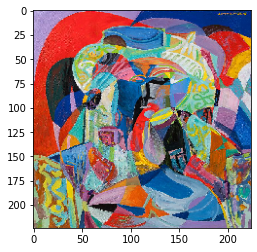

In [ ]:
display_image(load_and_preprocess_image('/content/style.jpg',size))

In [ ]:
files.upload()

Saving Taj_Mahal.jpg to Taj_Mahal.jpg


{'Taj_Mahal.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP  \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x003desc\x00\x00\x01\x84\x00\x00\x00lwtpt\x00\x00\x01\xf0\x00\x00\x00\x14bkpt\x00\x00\x02\x04\x00\x00\x00\x14rXYZ\x00\x00\x02\x18\x00\x00\x00\x14gXYZ\x00\x00\x02,\x00\x00\x00\x14bXYZ\x00\x00\x02@\x00\x00\x00\x14dmnd\x00\x00\x02T\x00\x00\x00pdmdd\x00\x00\x02\xc4\x00\x00\x00\x88vued\x00\x00\x03L\x00\x00\x00\x86view\x00\x00\x03\xd4\x00\x00\x00$lumi\x00\x00\x03\xf8\x00\x00\x00\x14meas\x00\x00\x04\x0c\x00\x00\x00$tech\x00\x00\x040\x00\x00\x00

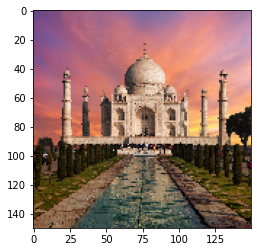

In [ ]:
display_image(load_and_preprocess_image('/content/Taj_Mahal.jpg'))

### *Content and Style Model*

In [ ]:
content_layer = 'block5_conv2'

style_layer = [
               'block1_conv1',
               'block3_conv1',
               'block5_conv1',]

content_model = Model(
    inputs = model.input,
    outputs = model.get_layer(content_layer).output
)

style_models = [Model(
    inputs = model.input,
    outputs = model.get_layer(layer).output) for layer in style_layer]

### *Content Cost*

In [ ]:
def content_cost(content,generated):
  a_C = content_model(content)
  a_G = content_model(generated)
  mse = tf.keras.losses.MeanSquaredError()
  cost = mse(a_C,a_G).numpy()
  return cost

### *Gram Matrix*

In [ ]:
def gram_matrix(A):
  n_C = tf.shape(A)[-1]
  A = tf.reshape(A, shape=(-1, n_C))
  n = tf.shape(A)[0]
  G = tf.matmul(A,A,transpose_a=True)
  return G / tf.cast(n, tf.float32)

### *Style Cost*

In [ ]:
weight = 1. / len(style_models)

def style_cost(style,generated):
  J_style = 0

  for style_model in style_models:
    a_S = style_model(style)
    a_G = style_model(generated)
    GS = gram_matrix(a_S)
    GG = gram_matrix(a_G)
    current_cost = tf.reduce_mean(tf.square(GS - GG))
    J_style += current_cost * weight

    J_style /= (size*size*len(style_models))
  return J_style

### *Training Loop*

In [ ]:
import time
generated_images = []

def training_loop(content_path, style_path, iterations=20, alpha=10., beta=100.):
  
  content = load_and_preprocess_image(content_path)
  style = load_and_preprocess_image(style_path)

  generated = tf.Variable(content, dtype=tf.float32)
  
  opt = tf.keras.optimizers.Adam(learning_rate=7.)

  best_cost = 1e12 + 0.1
  best_image = None

  start_time = time.time()

  for i in range(iterations):
    with tf.GradientTape() as tape:
      J_content = content_cost(content,generated)
      J_style = style_cost(style,generated)
      J_total = alpha * J_content + beta * J_style

    grads = tape.gradient(J_total, generated)
    opt.apply_gradients([(grads, generated)])

    if J_total < best_cost:
      best_cost = J_total
      best_image = generated.numpy()

    print("Cost at",i,":",J_total,"and time elapsed is",time.time()-start_time)
    generated_images.append(generated.numpy())

  return best_image

In [ ]:
best_image = training_loop('/content/Taj_Mahal.jpg','/content/style.jpg',iterations=300)

Cost at 0 : tf.Tensor(66750.15, shape=(), dtype=float32) and time elapsed is 0.23772788047790527
Cost at 1 : tf.Tensor(84892.01, shape=(), dtype=float32) and time elapsed is 0.44341254234313965
Cost at 2 : tf.Tensor(92759.445, shape=(), dtype=float32) and time elapsed is 0.6322619915008545
Cost at 3 : tf.Tensor(96452.53, shape=(), dtype=float32) and time elapsed is 0.8161680698394775
Cost at 4 : tf.Tensor(99765.17, shape=(), dtype=float32) and time elapsed is 0.9998517036437988
Cost at 5 : tf.Tensor(98087.22, shape=(), dtype=float32) and time elapsed is 1.1799309253692627
Cost at 6 : tf.Tensor(95660.65, shape=(), dtype=float32) and time elapsed is 1.3603308200836182
Cost at 7 : tf.Tensor(95495.664, shape=(), dtype=float32) and time elapsed is 1.5404627323150635
Cost at 8 : tf.Tensor(97391.836, shape=(), dtype=float32) and time elapsed is 1.7191123962402344
Cost at 9 : tf.Tensor(100283.445, shape=(), dtype=float32) and time elapsed is 1.89829421043396
Cost at 10 : tf.Tensor(101923.695, 

### *Plot the Results*

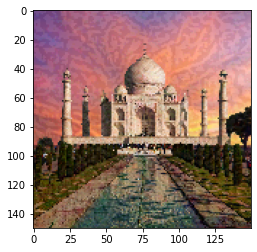

In [ ]:
image = display_image(best_image)
plt.savefig('/content/Modified_image.jpeg')

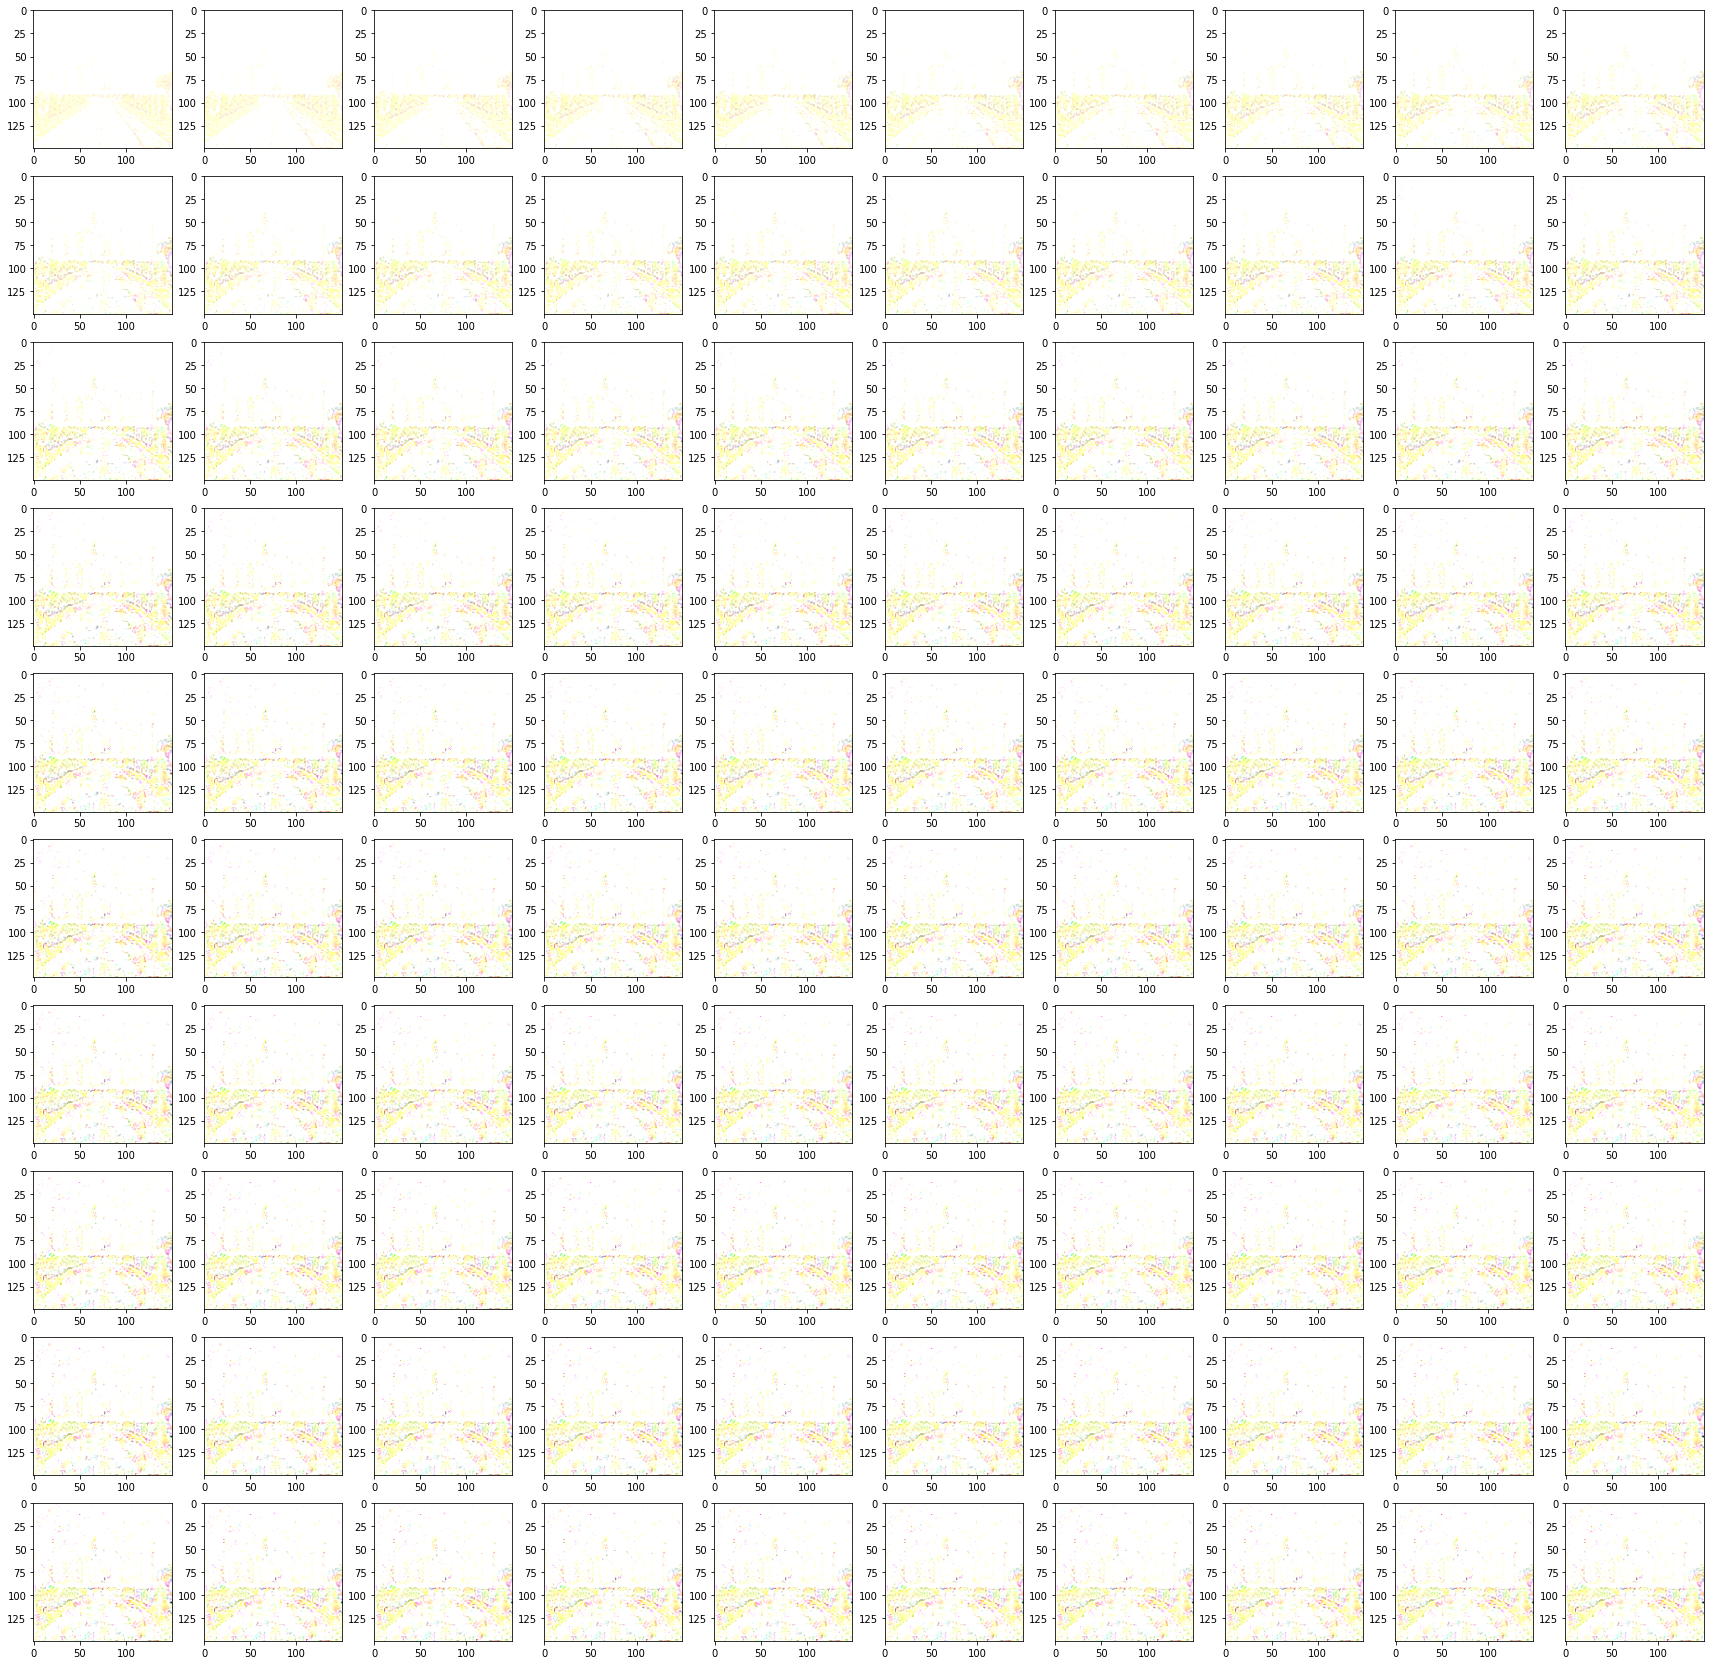

In [ ]:
plt.figure(figsize=(30,30))

for i in range(100):
  plt.subplot(10, 10, i+1)
  display_image(generated_images[i])

plt.show()